In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv("sent_train.csv")
valid_df = pd.read_csv("sent_valid.csv")
print(train_df.head())

                                                text  label
0  $BYND - JPMorgan reels in expectations on Beyo...      0
1  $CCL $RCL - Nomura points to bookings weakness...      0
2  $CX - Cemex cut at Credit Suisse, J.P. Morgan ...      0
3  $ESS: BTIG Research cuts to Neutral https://t....      0
4  $FNKO - Funko slides after Piper Jaffray PT cu...      0


In [3]:
X_train = train_df['text']
y_train = train_df['label']

X_valid = valid_df['text']
y_valid = valid_df['label']

In [4]:
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_valid_tfidf = vectorizer.transform(X_valid)

In [5]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_valid_tfidf)

In [6]:
print("Accuracy Score:", accuracy_score(y_valid, y_pred))
print("\nClassification Report:\n", classification_report(
    y_valid, y_pred, target_names=["Bearish (0)", "Bullish (1)", "Neutral (2)"]))

Accuracy Score: 0.7998324958123953

Classification Report:
               precision    recall  f1-score   support

 Bearish (0)       0.77      0.40      0.52       347
 Bullish (1)       0.77      0.56      0.65       475
 Neutral (2)       0.81      0.96      0.88      1566

    accuracy                           0.80      2388
   macro avg       0.78      0.64      0.68      2388
weighted avg       0.80      0.80      0.78      2388



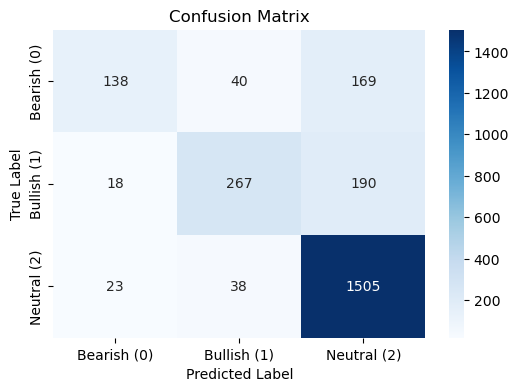

In [7]:
cm = confusion_matrix(y_valid, y_pred)
labels = ["Bearish (0)", "Bullish (1)", "Neutral (2)"]

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.savefig("confusion_matrix_regression.png", dpi=300)
plt.show()